In [43]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from PIL import Image

In [28]:
import string

letters = dict(zip(list(range(0,26)),string.ascii_lowercase))

In [29]:
ASL_train = pd.read_csv('sign_mnist_train\sign_mnist_train.csv')
ASL_test = pd.read_csv('sign_mnist_test\sign_mnist_test.csv')

In [30]:
X_train = ASL_train.drop('label',axis=1)
y_train = ASL_train['label']
X_test = ASL_test.drop('label',axis=1)
y_test = ASL_test['label']

<AxesSubplot: ylabel='Count'>

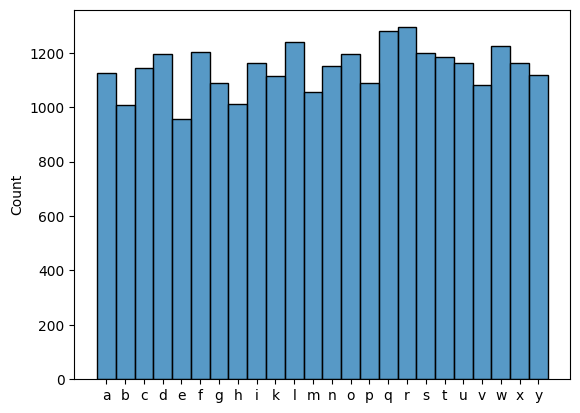

In [31]:
[letters[x] for x in y_train]
y_train_letters = [letters[x] for x in y_train]
y_train_letters.sort()
# np.array(y_train_letters)
sns.histplot(data=y_train_letters)

In [32]:
# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

In [33]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [34]:
X_train = X_train.reshape(27455,28,28)
X_test = X_test.reshape(7172,28,28)

In [35]:
X_train = X_train/255
X_test = X_test/255

In [105]:
hh = X_train[5]

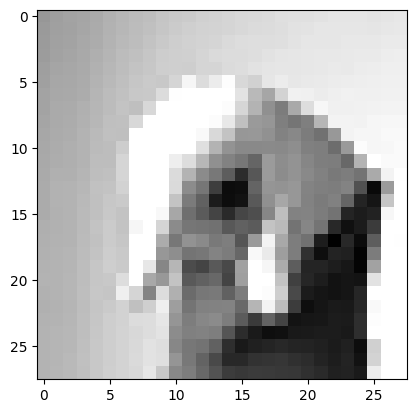

In [36]:
plt.imshow(X_train[5],cmap='gray')

In [67]:
a = X_train[0]*255

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
# para=[{'max_iter':[100,200]}]

logmodel = LogisticRegression(max_iter=200)
# GS = GridSearchCV(estimator=LogisticRegression(), param_grid=para, refit=True, verbose=3)
# logmodel.fit(X_train,y_train)

In [38]:
# log_preds = logmodel.predict(X_test)

In [39]:
# keras.utils.to_categorical([0,1,2,3], num_classes=4)

In [40]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, log_preds))
# print(classification_report(y_test,log_preds))

NameError: name 'log_preds' is not defined

In [41]:
model = Sequential()

model.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2,2))



model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2,2))





model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))          
model.add(Dense(26,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=6, batch_size=100, validation_data=(X_test,y_test))

Epoch 1/6
275/275 [==============================] - 26s 89ms/step - loss: 1.9727 - accuracy: 0.3828 - val_loss: 1.0781 - val_accuracy: 0.7266
Epoch 2/6
275/275 [==============================] - 28s 102ms/step - loss: 0.7559 - accuracy: 0.7405 - val_loss: 0.5746 - val_accuracy: 0.8413
Epoch 3/6
275/275 [==============================] - 28s 101ms/step - loss: 0.4446 - accuracy: 0.8455 - val_loss: 0.4023 - val_accuracy: 0.8956
Epoch 4/6
275/275 [==============================] - 23s 85ms/step - loss: 0.3135 - accuracy: 0.8904 - val_loss: 0.3435 - val_accuracy: 0.9127
Epoch 5/6
275/275 [==============================] - 29s 104ms/step - loss: 0.2168 - accuracy: 0.9240 - val_loss: 0.2669 - val_accuracy: 0.9313
Epoch 6/6
275/275 [==============================] - 32s 118ms/step - loss: 0.1837 - accuracy: 0.9374 - val_loss: 0.2192 - val_accuracy: 0.9342


In [102]:
model.evaluate(X_test,y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.2192 - accuracy: 0.9342


[0.21916040778160095, 0.9341884851455688]

In [70]:
model.save('saved_models/model.hdf5')

In [72]:
from sklearn.metrics import accuracy_score
from keras.models import load_model

In [73]:
mod = load_model('saved_models/model.hdf5')

In [82]:
X_test[0].reshape((1,28,28)).shape
mod.predict(X_test[0].reshape((1,28,28)))

1/1 [==============================] - 0s 24ms/step


array([[1.10697576e-10, 5.20183470e-08, 4.73053604e-02, 8.12267899e-07,
        3.16531938e-08, 1.11853203e-03, 9.23215032e-01, 2.38991133e-03,
        1.26314370e-09, 1.93733390e-10, 3.74329971e-07, 1.41896855e-03,
        1.01737763e-09, 8.75432022e-07, 5.95197598e-05, 1.28028187e-05,
        2.57825413e-05, 4.87117313e-06, 2.37965159e-09, 4.37313458e-04,
        1.13609637e-07, 2.56086764e-07, 4.91241448e-09, 2.40083206e-02,
        8.88129023e-07, 1.10095115e-07]], dtype=float32)

1/1 [==============================] - 0s 43ms/step
e


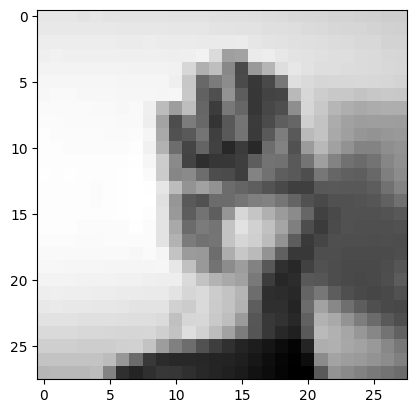

In [118]:
image = Image.open('Images\\20230220_084523.jpg')
image = image.resize((28,28))
image = image.convert('L')
image = image.rotate(-90)
image.save('im_thumb.jpg')
pixels = np.array(image.getdata()).reshape((1,28,28))/255
plt.imshow(pixels.reshape((28,28)),cmap='gray')
# print(image.size)
# print(mod.predict(pixels))
my_images_preds = model.predict(pixels)
my_images_preds = np.argmax(my_images_preds)
print(letters[my_images_preds])

In [74]:
a = mod.predict(X_test)

225/225 [==============================] - 2s 7ms/step


In [ ]:
preds = [np.argmax(a[x]) for x in range (0,len(a))]
result_letters = [np.argmax(a[x]) for x in range (0,len(a))]
result_letters = [letters[x] for x in result_letters]

accuracy_score(y_test,preds)
# print(letters[result_letters])
# print(f'Model: {[np.argmax(a[x]) for x in range (0,10)]}')
# print(f'''True values:
# {y_test[0:10]}''')

0.9063022866703848